In [1]:
from pymopt.voxel import VoxelPlateModel

from scipy import stats
import numpy as np
import pandas as pa
import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import r2_score
cp = sns.color_palette(n_colors=24)

In [2]:
def radialDistance(p,w,nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr
def calc_alpha(nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    return alpha[:-1]

def lightIntensityDist(rez):
    nn = 100
    dr = 0.01
    p_result = rez["p"]
    v_result = rez["v"]
    w_result = rez["w"]

    Tt_index = np.where(v_result[2]>0)[0]
    Rd_index = np.where(v_result[2]<0)[0]

    _,Rd = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
    _,Tt = radialDistance(p_result[:,Tt_index],w_result[Tt_index],nn,dr)
    return Rd,Tt

In [22]:
nPh = 5e5
grid_params={
    'thickness':[0.16,0.2,0.3],
}

params = {
    'thickness':[1,0.03],
    'ms':[127.119,167.825],
    'ma':[0.979,0.173],
    'g':[0.9,0.9375],
    'n':[1.375,1.560],
    'n_air':1.,
    'xy_size':10,
    'voxel_space':0.01,
}
Rd = [];Tt =[]
Rd_int = [];Tt_int =[]
thickness = []

for i in ParameterGrid(grid_params):
    print(i)
    params['thickness'][0] = i['thickness']
        
    model = VoxelPlateModel(nPh = nPh)
    model.build(**params)
    model = model.start()
    res = model.getRdTtValues()
    Rd.append(res['Rd'])
    Tt.append(res['Tt'])
    thickness.append(i['thickness'])
    res_int = model.get_result()
    Rd_,Tt_ = lightIntensityDist(res_int)
    Rd_int.append(Rd_)
    Tt_int.append(Tt_)

{'thickness': 0.16}
Memory area size for voxel storage: 21.084 Mbyte

###### Start ######

Progress: 0.51 [％]
Calculation time: 0 minutes 0.721 seconds.

Progress: 1.703 [％]
Calculation time: 0 minutes 1.784 seconds.

Progress: 4.454 [％]
Calculation time: 0 minutes 3.965 seconds.

Progress: 10.968 [％]
Calculation time: 0 minutes 8.205 seconds.

Progress: 31.674 [％]
Calculation time: 0 minutes 15.574 seconds.

Progress: 68.99 [％]
Calculation time: 0 minutes 24.347 seconds.

Progress: 93.776 [％]
Calculation time: 0 minutes 30.402 seconds.

Progress: 99.736 [％]
Calculation time: 0 minutes 32.870 seconds.

Progress: 99.998 [％]
Calculation time: 0 minutes 34.173 seconds.

Progress: 99.999 [％]
Calculation time: 0 minutes 35.974 seconds.


###### Finish ######
Maximum step number: 1202
######
Mean Rd 0.358119
Mean Tt 0.314956

Calculation time: 0 minutes 36.591 seconds.
{'thickness': 0.2}
Memory area size for voxel storage: 25.100 Mbyte

###### Start ######

Progress: 0.529 [％]
Calculation ti

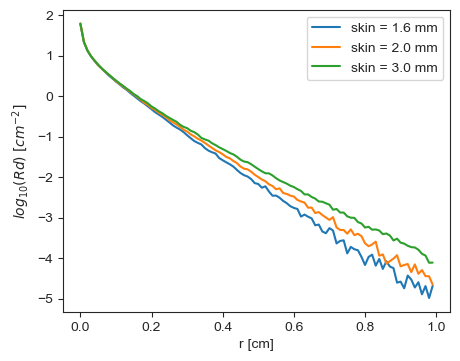

In [23]:
Rd_int = np.array(Rd_int)
alpha = calc_alpha(100,0.01)
plt.figure(figsize=(5,4),dpi=100)
for i in range(3):
    label = 'skin = '+str(thickness[i]*10)+' mm'
    plt.plot(alpha,np.log10(Rd_int[i]),label=label)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('$log_{10}(Rd)$ $[cm^{-2}]$')
plt.show()

In [32]:
nPh = 1e5
grid_params={
    'thickness':[0.16,0.2,0.3],
}

params = {
    'thickness':[1,0.03,5],
    'ms':[127.119,167.825,167.825*0.363],
    'ma':[0.0979,0.173,0.173*0.363],
    'g':[0.95,0.9375,0.5],
    'n':[1.375,1.560,1.560],
    'n_air':1.,
    'xy_size':10,
    'voxel_space':0.01,
}
Rd = [];Tt =[]
Rd_int2 = [];Tt_int2 =[]
thickness = []

for i in ParameterGrid(grid_params):
    print(i)
    params['thickness'][0] = i['thickness']
        
    model = VoxelPlateModel(nPh = nPh)
    model.build(**params)
    model = model.start()
    res = model.getRdTtValues()
    Rd.append(res['Rd'])
    Tt.append(res['Tt'])
    thickness.append(i['thickness'])
    res_int = model.get_result()
    Rd_,Tt_ = lightIntensityDist(res_int)
    Rd_int2.append(Rd_)
    Tt_int2.append(Tt_)

{'thickness': 0.16}
Memory area size for voxel storage: 523.086 Mbyte

###### Start ######

Progress: 0.263 [％]
Calculation time: 0 minutes 0.134 seconds.

Progress: 0.741 [％]
Calculation time: 0 minutes 0.324 seconds.

Progress: 1.924 [％]
Calculation time: 0 minutes 0.730 seconds.

Progress: 4.711 [％]
Calculation time: 0 minutes 1.620 seconds.

Progress: 11.012 [％]
Calculation time: 0 minutes 3.486 seconds.

Progress: 23.765 [％]
Calculation time: 0 minutes 7.320 seconds.

Progress: 43.273 [％]
Calculation time: 0 minutes 14.189 seconds.

Progress: 60.899 [％]
Calculation time: 0 minutes 24.797 seconds.

Progress: 73.979 [％]
Calculation time: 0 minutes 40.750 seconds.

Progress: 82.552 [％]
Calculation time: 1 minutes 5.068 seconds.

Progress: 87.909 [％]
Calculation time: 1 minutes 41.535 seconds.

Progress: 91.663 [％]
Calculation time: 2 minutes 33.224 seconds.

Progress: 94.386 [％]
Calculation time: 3 minutes 50.013 seconds.


###### Finish ######
Maximum step number: 13445
######
Mean 

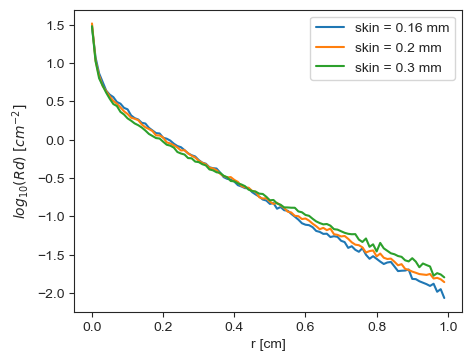

In [33]:
Rd_int2 = np.array(Rd_int2)
Tt_int = np.array(Tt_int)
alpha = calc_alpha(100,0.01)
plt.figure(figsize=(5,4),dpi=100)
for i in range(3):
    label = 'skin = '+str(thickness[i])+' mm'
    plt.plot(alpha,np.log10(Rd_int2[i]),label=label)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('$log_{10}(Rd)$ $[cm^{-2}]$')
plt.show()

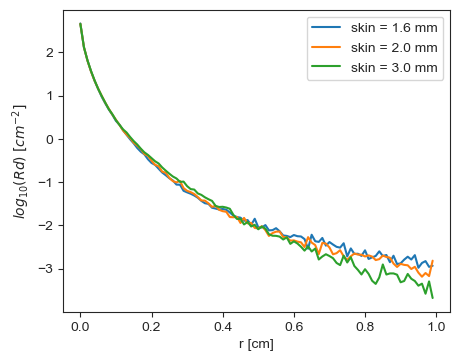

In [31]:
Rd_int2 = np.array(Rd_int2)
alpha = calc_alpha(100,0.01)
plt.figure(figsize=(5,4),dpi=100)
for i in range(3):
    label = 'skin = '+str(thickness[i]*10)+' mm'
    plt.plot(alpha,np.log10(Rd_int2[i]),label=label)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('$log_{10}(Rd)$ $[cm^{-2}]$')
plt.show()